In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
from contact_monitoring.rotation_helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'contact_monitoring'

In [3]:


rest_pt = np.array([0.1, 0.2, 0.3])
pt = np.array([0., 0., 0.5])

Tmats = []

for x_rot in np.linspace(-0.3,0.3,5):
    for y_rot in np.linspace(-0.3,0.3,5):
        rotation = np.array([x_rot, y_rot, 0])
        new_rotmat = xyz_to_rotation(rotation)
        new_pt = new_rotmat@pt+rest_pt
        Tmat = np.eye(4)
        Tmat[:3,3] = np.squeeze(new_pt)
        Tmat[:3,:3] = new_rotmat
        Tmats.append(Tmat)

NameError: name 'xyz_to_rotation' is not defined

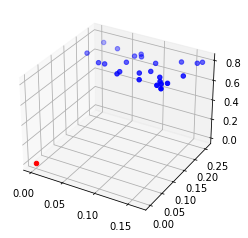

distances: [0.81661092 0.82012079 0.840369   0.83872887 0.82581861 0.84779037
 0.82710069 0.82946744 0.82609026 0.82435671 0.83682806 0.82170625
 0.82017641 0.83391138 0.83121804 0.83543183 0.81949045 0.85324962
 0.85128055 0.81967404 0.82957909 0.83893523 0.8202949  0.83816166
 0.81808313]


In [15]:
from visualize import plot_3d_points, plot_distance, plot_3d_points_segments
plot_3d_points(Tmats, rest_pt = np.array([0,0,0]))
plot_distance(Tmats, rest_pt = np.array([0,0,0]))

In [3]:
from .constraint import PointConstraint
constraint = PointConstraint()
constraint.fit(Tmats)

ImportError: attempted relative import with no known parent package

In [12]:
from constraint import CableConstraint
constraint = CableConstraint(rest_pt=np.array([0,0,0]))
constraint.fit(Tmats)

Initializing a CableConstraint with following params:
** Decision variables **
rest_pt:
: [rest_pt_0, rest_pt_1, rest_pt_2]
radius:
: radius

DEBUG
[array([0.060626  , 0.14774362, 0.7927185 ]), array([0.17154653, 0.27931827, 0.78768853])]
0.1721643185321939
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality con

 334  2.5319436e+00 0.00e+00 2.35e+01  -1.0 8.26e-02   1.5 1.00e+00 1.00e+00w  1
 335  1.5759067e+00 0.00e+00 1.15e+01  -1.0 3.64e-02   2.8 1.00e+00 1.00e+00w  1
 336  2.3095209e+00 0.00e+00 1.85e+01  -1.0 5.34e-02   2.3 1.00e+00 1.00e+00w  1
 337  7.6242287e-01 0.00e+00 1.50e+00  -1.0 2.58e-01   1.9 1.00e+00 1.56e-02f  6
 338  7.5933622e-01 0.00e+00 2.11e+00  -1.0 7.84e-03   2.3 1.00e+00 2.50e-01f  3
 339  7.5822680e-01 0.00e+00 3.50e+00  -1.0 1.88e-02   1.8 1.00e+00 6.25e-02f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  7.5790961e-01 0.00e+00 2.07e+00  -1.0 2.06e-02   2.2 1.00e+00 6.25e-02f  5
 341  7.5652254e-01 0.00e+00 3.50e+00  -1.0 1.97e-02   1.8 1.00e+00 6.25e-02f  5
 342  7.5580696e-01 0.00e+00 2.02e+00  -1.0 2.32e-02   2.2 1.00e+00 3.12e-02f  6
 343  7.5568875e-01 0.00e+00 1.50e+00  -1.0 2.05e-02   1.7 1.00e+00 1.56e-02f  7
 344  7.5513146e-01 0.00e+00 1.99e+00  -1.0 1.20e-02   2.1 1.00e+00 6.25e-02f  5
 345  7.5434306e-01 0.00e+00

 667  7.3239370e-01 0.00e+00 1.50e+00  -1.7 5.36e-03   2.4 1.00e+00 2.50e-01f  3
 668  7.3227207e-01 0.00e+00 1.43e+00  -1.7 2.01e-03   2.9 1.00e+00 1.25e-01f  4
 669  7.3207262e-01 0.00e+00 1.50e+00  -1.7 6.62e-03   2.4 1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670  7.3179580e-01 0.00e+00 5.00e-01  -1.7 2.26e-03   2.8 1.00e+00 1.25e-01f  4
 671  7.3164734e-01 0.00e+00 1.50e+00  -1.7 2.26e-03   2.3 1.00e+00 6.25e-02f  5
 672  7.3164574e-01 0.00e+00 5.00e-01  -1.7 2.55e-03   2.8 1.00e+00 9.77e-04f 11
 673  7.3164435e-01 0.00e+00 5.00e-01  -1.7 2.81e-03   2.3 1.00e+00 4.88e-04f 12
 674  7.3164423e-01 0.00e+00 5.00e-01  -1.7 9.55e-04   2.7 1.00e+00 1.22e-04f 14
 675  7.4157071e-01 0.00e+00 3.50e+00  -1.7 3.51e-03   2.2 1.00e+00 1.00e+00w  1
 676  7.5921438e-01 0.00e+00 8.50e+00  -1.7 7.52e-03   2.7 1.00e+00 1.00e+00w  1
 677  1.8601876e+00 0.00e+00 2.75e+01  -1.7 5.48e-02   2.2 1.00e+00 1.00e+00w  1
 678  7.3164420e-01 0.00e+00

 934  7.3157025e-01 0.00e+00 5.00e-01  -1.7 7.37e-03   2.4 1.00e+00 2.50e-01f  3
 935  7.3155888e-01 0.00e+00 5.00e-01  -1.7 7.62e-04   2.8 1.00e+00 1.56e-02f  7
 936  7.3155843e-01 0.00e+00 1.50e+00  -1.7 2.63e-03   2.3 1.00e+00 9.77e-04f 11
 937  7.3155777e-01 0.00e+00 5.00e-01  -1.7 2.58e-03   2.8 1.00e+00 4.88e-04f 12
 938  7.3155707e-01 0.00e+00 5.00e-01  -1.7 3.24e-03   2.3 1.00e+00 2.44e-04f 13
 939  7.3155697e-01 0.00e+00 1.50e+00  -1.7 9.65e-04   2.7 1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940  7.3155696e-01 0.00e+00 5.00e-01  -1.7 1.68e-02   2.2 1.00e+00 4.77e-07f 22
 941  7.3155696e-01 0.00e+00 1.50e+00  -1.7 1.09e-03   2.7 1.00e+00 3.81e-06f 19
 942  7.3155696e-01 0.00e+00 5.00e-01  -1.7 2.30e-02   2.2 1.00e+00 1.19e-07f 24
 943  7.3155696e-01 0.00e+00 5.00e-01  -1.7 1.22e-03   2.6 1.00e+00 9.54e-07f 21
 944  7.4638127e-01 0.00e+00 3.50e+00  -1.7 7.40e-03   2.1 1.00e+00 1.00e+00w  1
 945  7.7861141e-01 0.00e+00

1201  7.3175748e-01 0.00e+00 5.00e-01  -1.7 2.31e-03   2.3 1.00e+00 5.82e-11f 35
1202  7.3175748e-01 0.00e+00 5.00e-01  -1.7 8.67e-04   2.8 1.00e+00 5.82e-11f 35
1203  7.3175748e-01 0.00e+00 5.00e-01  -1.7 2.60e-03   2.3 1.00e+00 3.64e-12f 39
1204  7.3175748e-01 0.00e+00 1.50e+00  -1.7 9.75e-04   2.7 1.00e+00 1.82e-12f 40
1205  7.3175748e-01 0.00e+00 5.00e-01  -1.7 1.61e-02   2.2 1.00e+00 2.27e-13f 43
1206  7.3175748e-01 0.00e+00 5.00e-01  -1.7 1.10e-03   2.7 1.00e+00 1.82e-12f 40
1207  7.3175748e-01 0.00e+00 1.50e+00  -1.7 4.03e-03   2.2 1.00e+00 1.14e-13f 44
1208  7.3175748e-01 0.00e+00 5.00e-01  -1.7 4.07e-03   2.6 1.00e+00 4.55e-13f 42
1209  7.3175748e-01 0.00e+00 1.50e+00  -1.7 5.36e-03   2.1 1.00e+00 4.55e-13f 42
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210  7.6385314e-01 0.00e+00 6.50e+00  -1.7 4.75e-03   2.6 1.00e+00 1.00e+00w  1
1211  1.8569300e+00 0.00e+00 2.75e+01  -1.7 5.41e-02   2.1 1.00e+00 1.00e+00w  1
1212  1.5245650e+00 0.00e+00

1481  7.3172736e-01 0.00e+00 1.50e+00  -1.7 2.92e-03   2.4 1.00e+00 1.14e-13f 44
1482  7.3172736e-01 0.00e+00 5.00e-01  -1.7 2.25e-03   2.8 1.00e+00 9.09e-13f 41
1483  7.3172736e-01 0.00e+00 1.50e+00  -1.7 3.52e-03   2.3 1.00e+00 9.09e-13f 41
1484  7.3172736e-01 0.00e+00 5.00e-01  -1.7 2.53e-03   2.8 1.00e+00 1.82e-12f 40
1485  7.3172736e-01 0.00e+00 5.00e-01  -1.7 4.29e-03   2.3 1.00e+00 9.09e-13f 41
1486  7.3172736e-01 0.00e+00 1.50e+00  -1.7 1.09e-03   2.7 1.00e+00 4.55e-13f 42
1487  7.3172736e-01 0.00e+00 5.00e-01  -1.7 1.27e-02   2.2 1.00e+00 2.27e-13f 43
1488  7.3172736e-01 0.00e+00 1.50e+00  -1.7 1.25e-03   2.7 1.00e+00 1.82e-12f 40
1489  7.3172736e-01 0.00e+00 5.00e-01  -1.7 1.67e-02   2.2 1.00e+00 2.27e-13f 43
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490  7.3584291e-01 0.00e+00 1.50e+00  -1.7 1.45e-03   2.6 1.00e+00 1.00e+00w  1
1491  8.6327708e-01 0.00e+00 8.50e+00  -1.7 2.17e-02   2.1 1.00e+00 1.00e+00w  1
1492  5.3276026e+00 0.00e+00

1745  7.3708547e-01 0.00e+00 1.50e+00  -1.7 2.96e-01   2.0 1.00e+00 1.00e+00S 21
1746  7.3697223e-01 0.00e+00 6.50e+00  -1.7 6.05e-03   2.4 1.00e+00 5.00e-01f  2
1747  7.3360035e-01 0.00e+00 1.50e+00  -1.7 7.87e-02   1.9 1.00e+00 3.12e-02f  6
1748  7.3250229e-01 0.00e+00 2.50e+00  -1.7 8.13e-03   2.3 1.00e+00 1.25e-01f  4
1749  7.3194322e-01 0.00e+00 1.50e+00  -1.7 6.25e-02   1.9 1.00e+00 7.81e-03f  8
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750  7.3156404e-01 0.00e+00 2.50e+00  -1.7 1.05e-02   2.3 1.00e+00 1.56e-02f  7
1751  7.3155344e-01 0.00e+00 1.45e+00  -1.7 1.51e-01   1.8 1.00e+00 6.10e-05f 15
1752  7.3155007e-01 0.00e+00 1.50e+00  -1.7 1.07e-02   2.2 1.00e+00 3.91e-03f  9
1753  7.3154993e-01 0.00e+00 5.00e-01  -1.7 3.23e-03   2.7 1.00e+00 6.10e-05f 15
1754  7.3154983e-01 0.00e+00 5.00e-01  -1.7 7.30e-03   2.2 1.00e+00 1.53e-05f 17
1755  7.3154981e-01 0.00e+00 5.00e-01  -1.7 1.50e-03   2.6 1.00e+00 1.53e-05f 17
1756  7.5560519e-01 0.00e+00

2001  7.3155909e-01 0.00e+00 1.50e+00  -1.7 1.35e-03   2.6 1.00e+00 9.09e-13f 41
2002  7.3155909e-01 0.00e+00 5.00e-01  -1.7 2.15e-02   2.2 1.00e+00 5.68e-14f 45
2003  7.3586207e-01 0.00e+00 1.50e+00  -1.7 1.57e-03   2.6 1.00e+00 1.00e+00w  1
2004  9.0329727e-01 0.00e+00 1.05e+01  -1.7 3.05e-02   2.1 1.00e+00 1.00e+00w  1
2005  6.6301557e+00 0.00e+00 2.75e+01  -1.7 2.41e-01   1.6 1.00e+00 1.00e+00w  1
2006  7.3586207e-01 0.00e+00 1.50e+00  -1.7 2.95e-02   3.0 1.00e+00 1.00e+00S 21
2007  7.3498157e-01 0.00e+00 4.50e+00  -1.7 4.83e-03   2.5 1.00e+00 5.00e-01f  2
2008  7.3258268e-01 0.00e+00 1.50e+00  -1.7 4.35e-02   2.0 1.00e+00 3.12e-02f  6
2009  7.3250631e-01 0.00e+00 2.50e+00  -1.7 5.79e-03   2.4 1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2010  7.3180274e-01 0.00e+00 1.50e+00  -1.7 2.97e-02   2.0 1.00e+00 1.56e-02f  7
2011  7.3167526e-01 0.00e+00 5.00e-01  -1.7 7.15e-03   2.4 1.00e+00 3.12e-02f  6
2012  7.3154871e-01 0.00e+00

2303  7.3192765e-01 0.00e+00 5.16e-01  -1.7 2.40e-02   2.1 1.00e+00 7.28e-12f 38
2304  7.3192765e-01 0.00e+00 1.50e+00  -1.7 1.34e-03   2.6 1.00e+00 5.82e-11f 35
2305  7.3192765e-01 0.00e+00 5.16e-01  -1.7 3.60e-02   2.1 1.00e+00 1.82e-12f 40
2306  7.3192765e-01 0.00e+00 5.16e-01  -1.7 1.51e-03   2.5 1.00e+00 1.46e-11f 37
2307  7.3192765e-01 0.00e+00 1.50e+00  -1.7 1.28e-02   2.0 1.00e+00 4.55e-13f 42
2308  7.3192765e-01 0.00e+00 5.16e-01  -1.7 5.78e-03   2.5 1.00e+00 2.27e-13f 43
2309  7.3192765e-01 0.00e+00 1.50e+00  -1.7 2.29e-02   2.0 1.00e+00 1.14e-13f 44
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  7.8459306e-01 0.00e+00 8.50e+00  -1.7 6.86e-03   2.4 1.00e+00 1.00e+00w  1
2311  3.0580909e+00 0.00e+00 2.75e+01  -1.7 9.73e-02   1.9 1.00e+00 1.00e+00w  1
2312  2.5951796e+00 0.00e+00 2.75e+01  -1.7 1.48e-02   3.3 1.00e+00 1.00e+00w  1
2313  7.3192765e-01 0.00e+00 5.16e-01  -1.7 4.43e-02   2.8 1.00e+00 4.55e-13f 41
2314  7.3192765e-01 0.00e+00

2558  7.3164870e-01 0.00e+00 5.00e-01  -1.7 7.05e-03   2.4 1.00e+00 3.91e-03f  9
2559  7.3163308e-01 0.00e+00 5.00e-01  -1.7 7.96e-04   2.8 1.00e+00 1.56e-02f  7
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2560  7.3163226e-01 0.00e+00 1.50e+00  -1.7 3.43e-03   2.3 1.00e+00 4.88e-04f 12
2561  7.3163208e-01 0.00e+00 5.00e-01  -1.7 2.54e-03   2.8 1.00e+00 2.44e-04f 13
2562  7.4083961e-01 0.00e+00 1.50e+00  -1.7 4.20e-03   2.3 1.00e+00 1.00e+00w  1
2563  7.3399001e-01 0.00e+00 1.50e+00  -1.7 2.85e-03   2.7 1.00e+00 1.00e+00w  1
2564  8.2595140e-01 0.00e+00 8.50e+00  -1.7 1.05e-02   2.2 1.00e+00 1.00e+00w  1
2565  7.3163171e-01 0.00e+00 1.50e+00  -1.7 1.45e-01   1.8 1.00e+00 1.22e-04f 13
2566  7.3163170e-01 0.00e+00 5.00e-01  -1.7 1.80e-02   2.2 1.00e+00 7.63e-06f 18
2567  7.3163167e-01 0.00e+00 1.50e+00  -1.7 1.41e-03   2.6 1.00e+00 6.10e-05f 15
2568  7.3163164e-01 0.00e+00 5.00e-01  -1.7 2.55e-02   2.1 1.00e+00 1.91e-06f 20
2569  7.3163162e-01 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810  7.3193885e-01 0.00e+00 5.27e-01  -1.7 3.95e-03   2.3 1.00e+00 9.09e-13f 41
2811  7.3193885e-01 0.00e+00 1.50e+00  -1.7 9.99e-04   2.7 1.00e+00 9.09e-13f 41
2812  7.3193885e-01 0.00e+00 5.27e-01  -1.7 1.46e-02   2.2 1.00e+00 2.27e-13f 43
2813  7.3193885e-01 0.00e+00 1.50e+00  -1.7 1.14e-03   2.6 1.00e+00 1.82e-12f 40
2814  7.3193885e-01 0.00e+00 5.27e-01  -1.7 1.93e-02   2.2 1.00e+00 2.27e-13f 43
2815  7.3617912e-01 0.00e+00 1.50e+00  -1.7 1.32e-03   2.6 1.00e+00 1.00e+00w  1
2816  8.7639253e-01 0.00e+00 1.05e+01  -1.7 2.68e-02   2.1 1.00e+00 1.00e+00w  1
2817  6.8948728e+00 0.00e+00 2.75e+01  -1.7 2.39e-01   1.6 1.00e+00 1.00e+00w  1
2818  7.3617912e-01 0.00e+00 1.50e+00  -1.7 2.93e-02   3.0 1.00e+00 1.00e+00S 21
2819  7.3416445e-01 0.00e+00 4.50e+00  -1.7 4.80e-03   2.5 1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2820  7.3275823e-01 0.00e+00


Loaded 340 samples from plug dataset 
Dataset contains 2 segments:
Segment 1: 102 samples
Segment 2: 238 samples


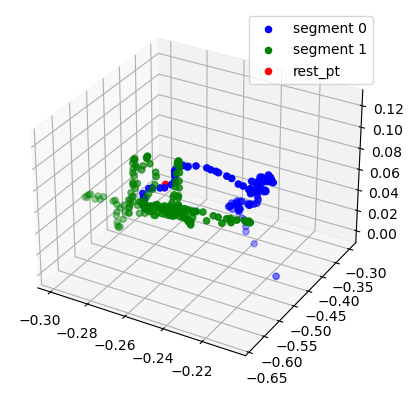


Loaded 369 samples from plug dataset 
Dataset contains 2 segments:
Segment 1: 50 samples
Segment 2: 319 samples


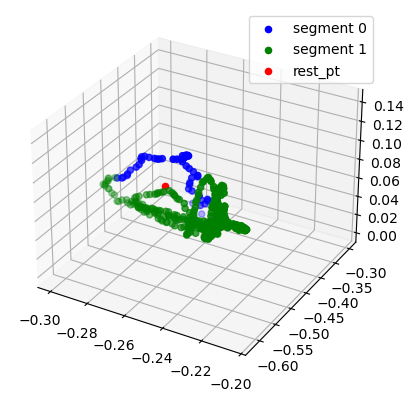


Loaded 509 samples from plug dataset 
Dataset contains 2 segments:
Segment 1: 166 samples
Segment 2: 343 samples


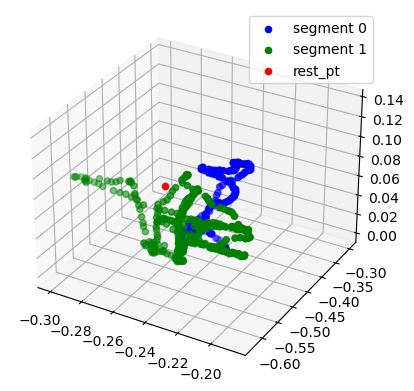


Loaded 490 samples from plug dataset less_
Dataset contains 2 segments:
Segment 1: 109 samples
Segment 2: 381 samples


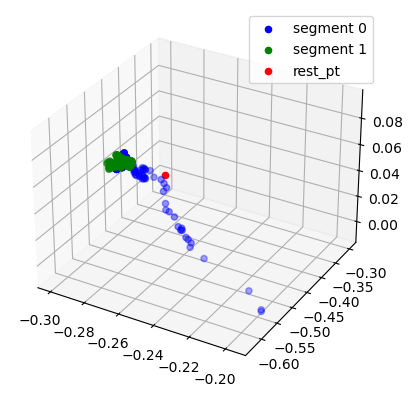


Loaded 506 samples from plug dataset less_
Dataset contains 2 segments:
Segment 1: 116 samples
Segment 2: 390 samples


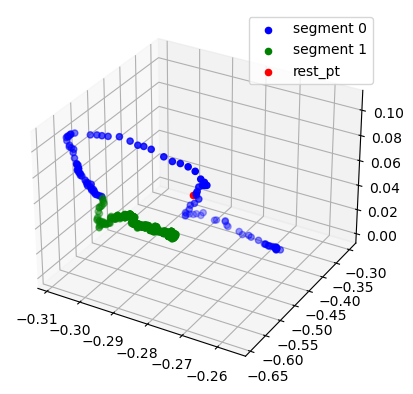


Loaded 509 samples from plug dataset less_
Dataset contains 2 segments:
Segment 1: 129 samples
Segment 2: 380 samples


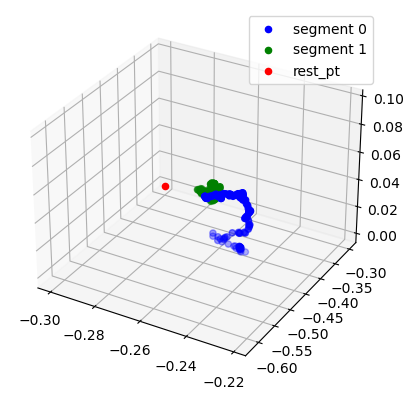


Loaded 510 samples from plug dataset threading_
Dataset contains 3 segments:
Segment 1: 145 samples
Segment 2: 142 samples
Segment 3: 223 samples


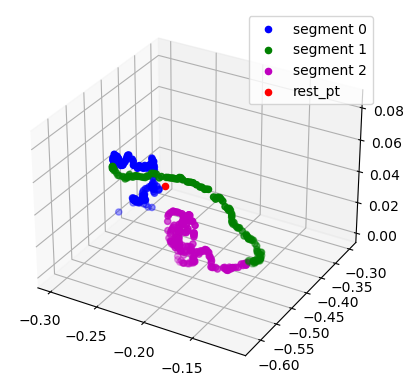


Loaded 449 samples from plug dataset threading_
Dataset contains 3 segments:
Segment 1: 133 samples
Segment 2: 128 samples
Segment 3: 188 samples


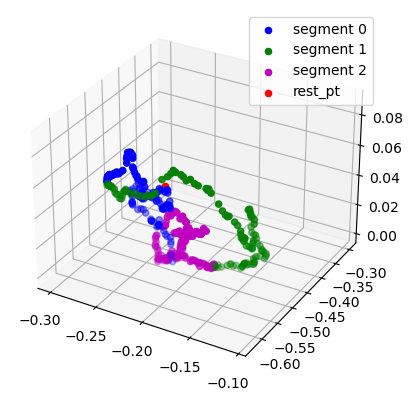


Loaded 507 samples from plug dataset threading_
Dataset contains 3 segments:
Segment 1: 108 samples
Segment 2: 111 samples
Segment 3: 288 samples


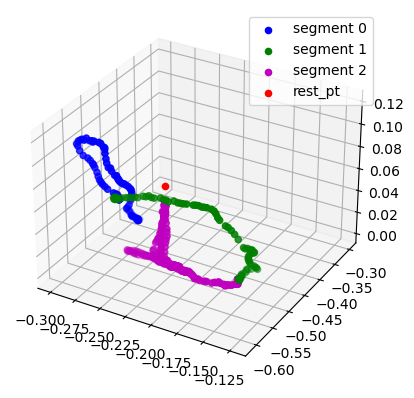

In [177]:
from dataload_helper import plug
# import dataset from plug experiment
# clustered True  -> GMM segmentation
# clustered False -> anotated segmentation
# experiments are: "threading_"; "less_"; ""

for i in range(3):
    dataset = plug(index=1+i, experiment="", clustered=False, segment=True).load()
    plot_3d_points_segments(dataset,[-.3,-.3,0])


for i in range(3):
    dataset = plug(index=1+i, experiment="less_", clustered=False, segment=True).load()
    plot_3d_points_segments(dataset,[-.3,-.3,0])

for i in range(3):
    dataset = plug(index=1+i, experiment="threading_", clustered=False, segment=True).load()
    plot_3d_points_segments(dataset,[-.3,-.3,0])


Loaded 375 samples from rake dataset
Dataset contains 2 segments:
Segment 1: 159 samples
Segment 2: 216 samples


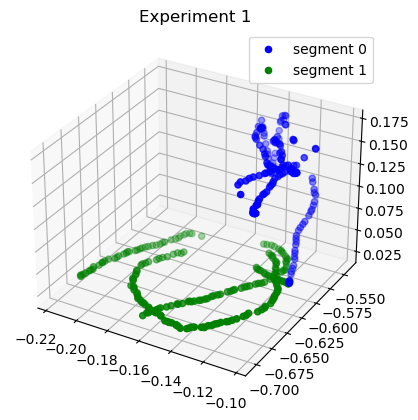


Loaded 326 samples from rake dataset
Dataset contains 2 segments:
Segment 1: 138 samples
Segment 2: 188 samples


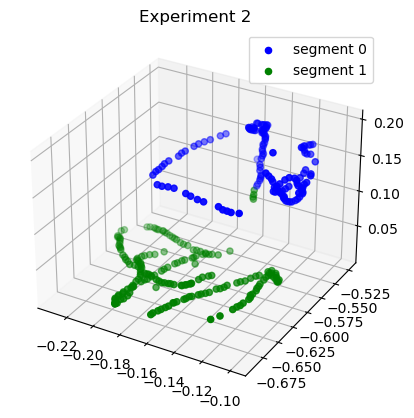


Loaded 442 samples from rake dataset
Dataset contains 2 segments:
Segment 1: 145 samples
Segment 2: 297 samples


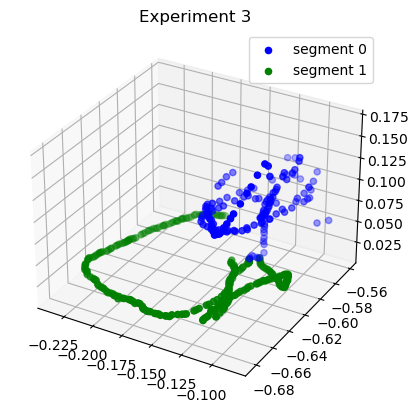


Loaded 431 samples from rake dataset
Dataset contains 2 segments:
Segment 1: 140 samples
Segment 2: 291 samples


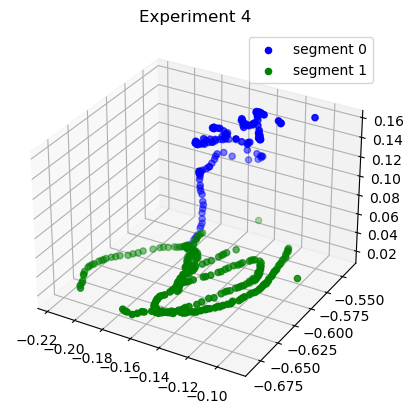


Loaded 279 samples from rake dataset
Dataset contains 2 segments:
Segment 1: 113 samples
Segment 2: 166 samples


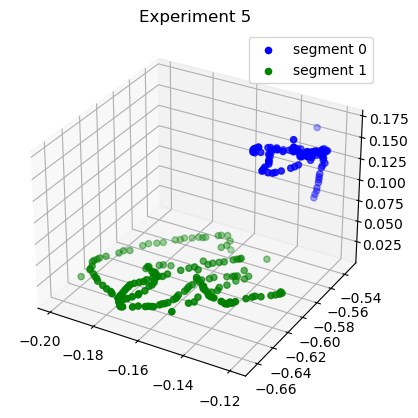

In [184]:
from dataload_helper import rake

for i in range(5):
    dataset = rake(index=i+1, clustered=False, segment=True).load(center=True)
    plot_3d_points_segments(dataset,[0,0,0], exp_n=i+1)
